# Assignment 10 (Recommendation Engine)
### Books Dataset

In [ ]:
Problem statement.

Build a recommender system by using cosine simillarties score.

## Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Dataset

In [2]:
#getting error while importing data: UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 747: invalid start byte
# save the csv file as UTF-8 CSV format to resolve

book_df = pd.read_csv("book.csv")

In [3]:
book_df.head(5)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


# EDA and Data visualizations

In [4]:
book_df.shape

# There are 10000 rows and 4 columns

(10000, 4)

### Removing the Unwanted 1st Column 

In [5]:
# removing the Unwanted 1st Column 
book_df = book_df.iloc[:,1:]
book_df

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [6]:
book_df.head(5)

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


### Renaming the columns and saving in books(object)

In [7]:
# rename the User.ID column, Book.Title,  and Book.Rating
books = book_df.rename({'User.ID': 'userId', 'Book.Title': 'BookTitle','Book.Rating': 'BookRating'},axis=1)

In [8]:
books

,userId,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


<AxesSubplot:>

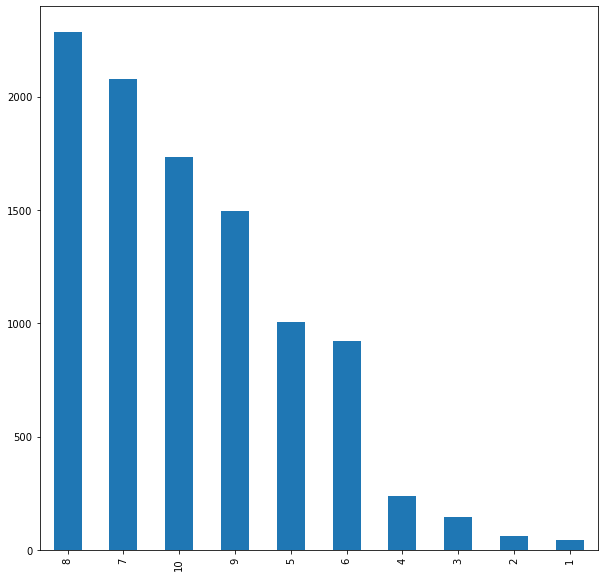

In [9]:
#Which rating is repeated how many times?
plt.figure(figsize=(10,10))
books["BookRating"].value_counts().plot(kind="bar")

# 8 and 7  are the most preferred rating(majority of the ratings)
# Some people also giving rating like 1, 2, 3

In [10]:
#Total number of unique users/Customers in the dataset
len(books.userId.unique())

# ->2182 i.e out of 10000 some of user purchased same books multiple times.
# 2182 uniue userIds are there

2182

In [11]:
# Total unique Books In my data how many

len(books.BookTitle.unique())
# 9659 uniue BookTitles are there out of 10000

9659

In [12]:
# SORT wrt userId :It will give all unique Ascending rows wrt User.ID
books.sort_values(['userId', 'BookTitle'])

,userId,BookTitle,BookRating
2399,8,Ancient Celtic Romances,5
2403,8,Keepers of the Earth Teachers Guide,6
2405,8,The Art Of Celtia,7
2404,8,The Celts Activity Book,6
2400,8,The Western way: A practical guide to the West...,5
...,...,...,...
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7
2396,278854,Blast From the Past,7
2398,278854,Celtic Mythology (Library of the World's Myths...,8


In [13]:
books.head(5)

,userId,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [14]:
books.shape

(10000, 3)

# Pivot Table 
### What kind of Pivot table? -> I am creating Userid/(Customers) are going to be the rows 
### and Columns are going to be the different Books/(products)

### and Filling/Imputing NaNs with 0

In [15]:
# Now we are trying to create user_movies_df object-> creating a Pivot Table and *Filling NaNs with 0

books.pivot_table(index='userId',  #Rows |            2182  unique userIds 
                columns='BookTitle', #Columns -- 9659 Unique BookTitles
                values='BookRating').fillna(0) #values are ratings: What exactly are the ratings given by users


BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [16]:
#Storing/Copying the above Matrix in onbject (This Code Not Needed): 

user_books_df = books.pivot_table(index='userId',  #Rows |            2182  unique userIds 
                columns='BookTitle', #Columns -- 9659 Unique BookTitles
                values='BookRating').fillna(0) #values are ratings: What exactly are the ratings given by users


In [17]:
#Now this is my Similarity matrix
user_books_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


# Calculating Cosine Similarity between Users
### Importing the Libraries Related to Cosine

In [18]:
#Calculating Cosine Similarity between Users

import scipy
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation #these are metrics for finding similarities

# pairwise_distances: If you give any two customers/Users they will tell you Similarity / Dissimilarity between the 2 cuustomers
# Spatial : stands for geographical locations/distances whenever we are dealing with vectors we have to use this library it will calculate the distancce much much faster since we have 2182 rows/userIds
# To calculate cosine and correlation we have to use scipy.spatial.distance

### Building Similarity Between userIds (cosine similarity)
### i.e for all [2182-C-2](permutation and Combinations)

In [19]:
#Importing all those pairwise distances: We have to find the pairwise distances: because we have to find Similarity  
# pairwise, distance is nothing but dissimilarity
# So I will find the distances of all USERS PAIRWISE with one another using "Cosine Similarity metric". 
# I am storing Cosine Similarity metrics in the 2182*2182 Data Shape

# from sklearn.metrics import pairwise_distances
# from scipy.spatial.distance import cosine, correlation #these are metrics for finding similarities

# SIMILARITY = 1 - DISSIMILARITY
user_sim = 1 - pairwise_distances(user_books_df.values, metric='cosine')

In [20]:
# So these are CoSine Similarity Values
user_sim   # This is an array in Metric: Here Im going to find out all the Similarities i.e Cust1 with Cust1, Cust2 with c2,Cust1 with all

# We got Cosine Similarity metrics: diagonally distance between rows and columns are Same i.e. 1.0
# Cos Theta will be in (0 to 1): If the angle between theta is more they are less similar 
# and if the angle between theta is less they are more similar 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
user_sim.shape

(2182, 2182)

## Storing the above generated Cosine Similarity values in DataFrame

In [22]:
# We converted the above array in Matrix:Storing the results in a  user_sim_df object in pd.dataframe  in 0 and 1s in columns
#We obtained user_sim in array , so we store in a df
user_sim_df = pd.DataFrame(user_sim)  # This is data frame and matrix now as we converted 

In [23]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### FINAL SIMILARITY MATRIX (Used Cosine Similarity)

In [24]:
# Slicing for Inference only
user_sim_df.iloc[0:6,0:6]

#Inferences:  value 1.0 means User 0 and User 1 are 100% Similar
# NOTE: Diagonally they are 1 because same user comparision!

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
user_books_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


## index 0 does not make any sense So set the Index/Userids as per the DataSet Sorted UserIds only unique

In [26]:
# Set the index and column names to userIds 

user_sim_df.index = list(user_books_df.index)  # user_books.index : from the PIVOT table 
user_sim_df.columns = list(user_books_df.index)
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Just to make the above Diagonal Values as 0s!
# Final Similarity Martrix

In [27]:
np.fill_diagonal(user_sim, 0)
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# # Just to make the above Diagonal Values as 0s!
# np.fill_diagonal(user_sim, 0)
# user_sim_df

<AxesSubplot:>

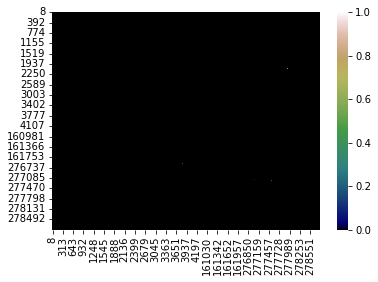

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(user_sim_df,cmap='gist_earth')

# Finding the Recommendations for any users 

In [29]:
# Most Similar Users/readers
user_sim_df.idxmax(axis=1)[0:20]

8          8
9          8
10         8
12         8
14         8
16         8
17         8
19    278418
22         8
26         8
32         8
39         8
42         8
44         8
51      3757
53      1996
56         8
64         8
67         8
69         8
dtype: int64

In [30]:
# extract the books which userId 53 & 1996 have watched
books[(books['userId']==53) | (books['userId']==1996)]
#Sick Puppy is common for both users

,userId,BookTitle,BookRating
2427,53,Sick Puppy,3
2428,53,Reliquary,10
2429,53,Turning Thirty,6
2430,53,Prey,9
4589,1996,Sick Puppy,8
4590,1996,"CSI, Miami: Heat Wave",7
4591,1996,Tempting the Heiress,7


In [31]:
reader1=books[books['userId']==19]
reader2=books[books['userId']==278418]
pd.merge(reader1,reader2,on='BookTitle',how='inner')
# The Murder Book is the common book for 19 and 278418

,userId_x,BookTitle,BookRating_x,userId_y,BookRating_y
0,19,The Murder Book,7,278418,6


In [32]:
user_sim_df.idxmax(axis=1)[400:]

1473           8
1475           8
1484           8
1485      278356
1486           8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 1782, dtype: int64

In [33]:
reader1=books[books['userId']==278851]
reader2=books[books['userId']==278202]
pd.merge(reader1,reader2,on='BookTitle',how='inner')
# Black Notice is the common book for 278851 and 278202

,userId_x,BookTitle,BookRating_x,userId_y,BookRating_y
0,278851,Black Notice,5,278202,3


In [ ]:
@@# Set the index and column names to userIds 

# user_sim_df.index = books['userId'].unique()  # user_books.index : from the PIVOT table 
# user_sim_df.columns = books['userId'].unique()
# user_sim_df

In [ ]:
@@#
# np.fill_diagonal(user_sim, 0)
# user_sim_df

# CORRELATION similarity

In [53]:
books1 = books.copy()

In [54]:
books1

,userId,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [55]:
# Dropping Duplicate userids
books1.drop_duplicates(subset ="userId", keep = False, inplace = True)

In [56]:
books1

,userId,BookTitle,BookRating
0,276726,Classical Mythology,5
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
5,276744,The Kitchen God's Wife,7
6,276745,What If?: The World's Foremost Military Histor...,10
...,...,...,...
9986,162103,Slowness: A Novel,7
9987,162107,What's Bred in the Bone,7
9988,162109,The Flower in the Skull,10
9989,162113,The Cape Ann (Contemporary American Fiction),8


In [57]:
# Making Pivot (Userid as Indexes and Books as columns)
user_book_df = books1.pivot(index='userId', columns='BookTitle', values='BookRating')

In [58]:
user_book_df

BookTitle,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)",500 palabras nuevas para ti / 500 Words To Grow On,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
userId,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#Impute those NaNs with 0 values
user_book_df.fillna(0, inplace=True)

In [60]:
user_book_df.head(2)

BookTitle,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)",500 palabras nuevas para ti / 500 Words To Grow On,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
userId,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
#Calculating Correlation Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

user_sim_corr = 1 - pairwise_distances(user_book_df.values, metric='correlation')
user_sim_corr

array([[ 1.00000000e+00, -7.62776506e-04, -7.62776506e-04, ...,
        -7.62776506e-04, -7.62776506e-04, -7.62776506e-04],
       [-7.62776506e-04,  1.00000000e+00, -7.62776506e-04, ...,
        -7.62776506e-04, -7.62776506e-04, -7.62776506e-04],
       [-7.62776506e-04, -7.62776506e-04,  1.00000000e+00, ...,
        -7.62776506e-04, -7.62776506e-04, -7.62776506e-04],
       ...,
       [-7.62776506e-04, -7.62776506e-04, -7.62776506e-04, ...,
         1.00000000e+00, -7.62776506e-04, -7.62776506e-04],
       [-7.62776506e-04, -7.62776506e-04, -7.62776506e-04, ...,
        -7.62776506e-04,  1.00000000e+00, -7.62776506e-04],
       [-7.62776506e-04, -7.62776506e-04, -7.62776506e-04, ...,
        -7.62776506e-04, -7.62776506e-04,  1.00000000e+00]])

In [62]:
#Storing the above obtained correlation of array in a DF
user_sim_corr_df=pd.DataFrame(user_sim_corr)
user_sim_corr_df.shape

(1323, 1323)

In [63]:
user_sim_corr_df

,0,1,2,3,4,5,6,7,8,9,...,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322
0,1.000000,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
1,-0.000763,1.000000,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
2,-0.000763,-0.000763,1.000000,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
3,-0.000763,-0.000763,-0.000763,1.000000,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
4,-0.000763,-0.000763,-0.000763,-0.000763,1.000000,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,1.000000,-0.000763,-0.000763,-0.000763,-0.000763
1319,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,1.000000,-0.000763,-0.000763,-0.000763
1320,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,1.000000,-0.000763,-0.000763
1321,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,1.000000,-0.000763


In [66]:
np.fill_diagonal(user_sim_corr, 0)
#user_sim_df.iloc[0:5, 0:5]

In [67]:
user_sim_corr

array([[ 0.        , -0.00076278, -0.00076278, ..., -0.00076278,
        -0.00076278, -0.00076278],
       [-0.00076278,  0.        , -0.00076278, ..., -0.00076278,
        -0.00076278, -0.00076278],
       [-0.00076278, -0.00076278,  0.        , ..., -0.00076278,
        -0.00076278, -0.00076278],
       ...,
       [-0.00076278, -0.00076278, -0.00076278, ...,  0.        ,
        -0.00076278, -0.00076278],
       [-0.00076278, -0.00076278, -0.00076278, ..., -0.00076278,
         0.        , -0.00076278],
       [-0.00076278, -0.00076278, -0.00076278, ..., -0.00076278,
        -0.00076278,  0.        ]])

In [68]:
user_sim_corr_df.sort_values([9],ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322
9,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,0.000000,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
0,0.000000,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
696,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
670,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
674,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
726,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
240,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763
730,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,...,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763,-0.000763


### user defined function for recommending any users directly

In [69]:
def give_reco_correlation(customer_id):
    tem=list(user_sim_corr_df.sort_values([customer_id],ascending=False).head(100).index)
    book_list=[]
    for i in tem:
        book_list=book_list+list(books1[books1["userId"]==i]["BookTitle"])
    return set(book_list)-set(books1[books1["userId"]==customer_id]["BookTitle"])

In [70]:
# Recommendation using correlation similarity
give_reco_correlation(678)

{'A Thousand Acres',
 'El caballero de la armadura oxidada',
 'Final Target',
 'Gone, Baby, Gone: A Novel',
 'High Five (A Stephanie Plum Novel)',
 'Jane Eyre',
 'S.W.A.T.',
 'Science and Health with Key to the Scriptures (W.M.B.E.)',
 'Shadowrun: Never Deal With a Dragon (Secrets of Power, No 1)',
 'Sons from Afar',
 'Stay Out of the Basement (Goosebumps, No 2)',
 'The Grey Horse',
 'The Man Who Planted Trees',
 'The Man with the Dancing Eyes',
 'The Prometheus Deception'}

# different method (correlation)

In [71]:
books1.shape

(1323, 3)

In [72]:
books1

,userId,BookTitle,BookRating
0,276726,Classical Mythology,5
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
5,276744,The Kitchen God's Wife,7
6,276745,What If?: The World's Foremost Military Histor...,10
...,...,...,...
9986,162103,Slowness: A Novel,7
9987,162107,What's Bred in the Bone,7
9988,162109,The Flower in the Skull,10
9989,162113,The Cape Ann (Contemporary American Fiction),8


In [251]:
user_book_df1 = books1.pivot(index='BookTitle', columns='userId', values='BookRating').fillna(0)

In [253]:
user_book_df1.columns = books1['userId'].unique()
user_book_df1

,276726,276736,276737,276744,276745,276748,276751,276754,276755,276760,...,162047,162054,162063,162068,162091,162103,162107,162109,162113,162129
BookTitle,,,,,,,,,,,,,,,,,,,,,
101 Bright Ideas: Esl Activities for All Ages,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11th Hour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"20,001 Names for Baby",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yuwipi: Vision and Experience in Oglala Ritual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen in the Art of Archery (Vintage Spiritual Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zodiac: The Eco-Thriller,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
user_book_df1.corr().round(2)

,276726,276736,276737,276744,276745,276748,276751,276754,276755,276760,...,162047,162054,162063,162068,162091,162103,162107,162109,162113,162129
276726,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
276736,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
276737,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
276744,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
276745,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162103,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0
162107,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0
162109,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0
162113,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0


## 3. Using Euclideon distance as a Metric for UBCF

In [234]:
books2 = books.copy()

In [236]:
from sklearn.metrics import pairwise_distances

euclideon_recommendataion = pd.pivot_table(data = books2,values='BookRating',index='userId',columns='BookTitle').fillna(0)
euclideon_recommendataion

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [237]:
books2['userId'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [239]:
euclideon_df = pd.DataFrame(pairwise_distances(X = euclideon_recommendataion,metric='euclidean')).round(2)
euclideon_df.columns = books2['userId'].unique()
euclideon_df.index   = books2['userId'].unique()
euclideon_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.00,16.03,16.03,17.92,17.52,17.38,18.44,16.43,16.43,20.05,...,17.92,22.83,16.88,37.85,18.49,16.88,17.38,29.05,16.88,22.74
276729,16.03,0.00,8.49,11.66,11.05,10.82,12.45,9.22,9.22,14.73,...,11.66,18.33,10.00,35.33,12.53,10.00,10.82,25.67,10.00,18.22
276736,16.03,8.49,0.00,11.66,11.05,10.82,12.45,9.22,9.22,14.73,...,11.66,18.33,10.00,35.33,12.53,10.00,10.82,25.67,10.00,18.22
276737,17.92,11.66,11.66,0.00,13.64,13.45,14.80,12.21,12.21,16.76,...,14.14,20.00,12.81,36.22,14.87,12.81,13.45,26.89,12.81,19.90
276744,17.52,11.05,11.05,13.64,0.00,12.92,14.32,11.62,11.62,16.34,...,13.64,19.65,12.25,36.03,14.39,12.25,12.92,26.63,12.25,19.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,16.88,10.00,10.00,12.81,12.25,12.04,13.53,10.63,10.63,15.65,...,12.81,19.08,11.31,35.72,13.60,0.00,12.04,26.21,11.31,18.97
162109,17.38,10.82,10.82,13.45,12.92,12.73,14.14,11.40,11.40,16.19,...,13.45,19.52,12.04,35.96,14.21,12.04,0.00,26.53,12.04,19.42
162113,29.05,25.67,25.67,26.89,26.63,26.53,27.24,25.92,25.92,28.35,...,26.89,30.38,26.21,42.84,27.28,26.21,26.53,0.00,26.21,30.32
162121,16.88,10.00,10.00,12.81,12.25,12.04,13.53,10.63,10.63,15.65,...,12.81,19.08,11.31,35.72,13.60,11.31,12.04,26.21,0.00,18.97
